# Estadistica Aplicada

Sesion 18, 16 de Octubre

Jesus Adrian Cordero Hernandez 1952778

GPO 41

In [23]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
## Librerias especializadas
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# Estimar modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [31]:
plt.rcParams['figure.figsize'] = (10,6)

In [25]:
## datos
igae_sa = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/igae_deses.csv')
igae_sa

,meses,IGAE_DESES
0,1993/01,56.282290
1,1993/02,57.708594
2,1993/03,57.825254
3,1993/04,57.179522
4,1993/05,57.895451
...,...,...
362,2023/03,102.032776
363,2023/04,102.735045
364,2023/05,102.924688
365,2023/06,103.438087


In [26]:
igae_sa['meses']= pd.to_datetime(igae_sa['meses'], format= '%Y/%m')
igae_sa

,meses,IGAE_DESES
0,1993-01-01,56.282290
1,1993-02-01,57.708594
2,1993-03-01,57.825254
3,1993-04-01,57.179522
4,1993-05-01,57.895451
...,...,...
362,2023-03-01,102.032776
363,2023-04-01,102.735045
364,2023-05-01,102.924688
365,2023-06-01,103.438087


In [27]:
# Hacerlo index 
igae_sa = igae_sa.set_index('meses')

In [28]:
igae_sa = igae_sa.asfreq('MS')

In [29]:
igae_sa.index

DatetimeIndex(['1993-01-01', '1993-02-01', '1993-03-01', '1993-04-01',
               '1993-05-01', '1993-06-01', '1993-07-01', '1993-08-01',
               '1993-09-01', '1993-10-01',
               ...
               '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01',
               '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01'],
              dtype='datetime64[ns]', name='meses', length=367, freq='MS')

###
ARIMA (series sin efecto estacional)

SARIMA (series con componente estacional)

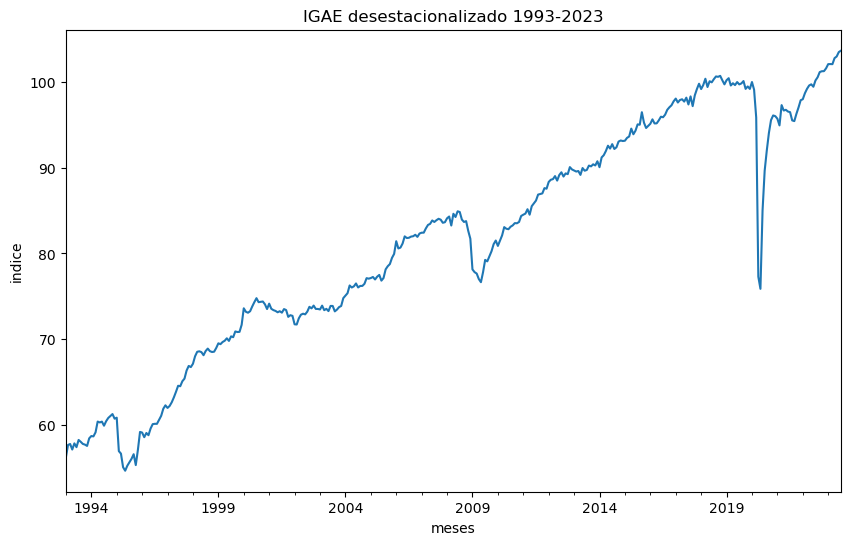

In [32]:
igae_sa['IGAE_DESES'].plot()
plt.title('IGAE desestacionalizado 1993-2023')
plt.ylabel('indice');

In [36]:
## Prueba de Dickey-filler aumentada
## Ho: No es estacionaria
## Ha: Estacionaria
df_test = adfuller(igae_sa['IGAE_DESES'])
print(df_test)
## P-valor se encuentra en la posicion 1
pvalue = df_test[1]
pvalue

(-1.0481779348666826, 0.7352896929912628, 2, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, 1147.2710040898037)


0.7352896929912628

## No rechazamos Ho, significa que la serie es No estacionaria

In [38]:
## Hacerla estacionaria con "las primeras diferencias"
igae_sa['igae_diff'] = igae_sa['IGAE_DESES'].diff()
igae_sa

,IGAE_DESES,igae_diff
meses,,
1993-01-01,56.282290,NaN
1993-02-01,57.708594,1.426305
1993-03-01,57.825254,0.116660
1993-04-01,57.179522,-0.645732
1993-05-01,57.895451,0.715929
...,...,...
2023-03-01,102.032776,-0.011138
2023-04-01,102.735045,0.702268
2023-05-01,102.924688,0.189644


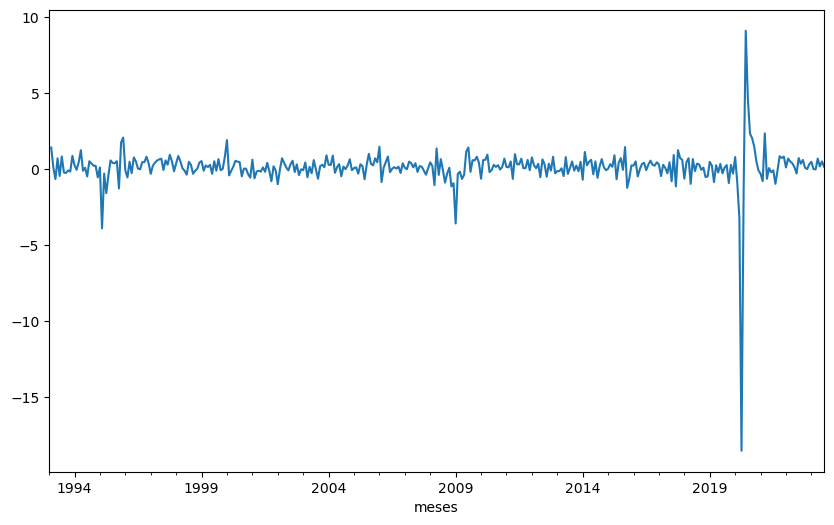

In [39]:
## Graficar esta nueva serie
igae_sa['igae_diff'].plot();

In [40]:
## Corroborar si las ´rimeras dif son estacionarias
## Prueba de Dickey-filler aumentada
## Ho: No es estacionaria
## Ha: Estacionaria
df_test1 = adfuller(igae_sa['igae_diff'].dropna())
pvalue1 = df_test1[1]
pvalue1.round(3)

0.0

## Rechazamos Ho, significa que las primeras dif del igae son estacionarias
IGAE I(1)

Primeras diferencias I(0)

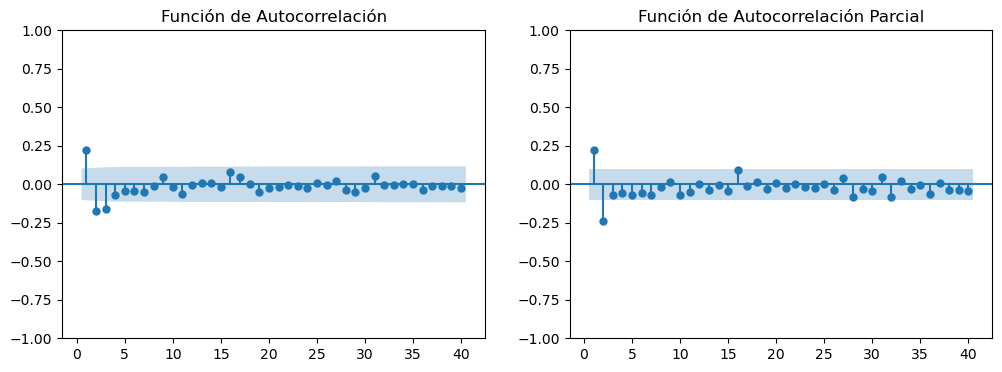

In [51]:
## GRAFICAS DE AUTOCORRELACION Y AUTOCORRELACION PARCIAL 
ig, ax = plt.subplots(1,2,figsize=(12,4))
plot_acf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(igae_sa['igae_diff'].dropna(), zero=False, lags=40, ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show();

In [53]:
## AR(1)
modelo_prueba = ARIMA (igae_sa['igae_diff'].dropna(),order=(1,0,0))
resultadop = modelo_prueba.fit()
print(resultadop.summary())

                               SARIMAX Results                                
Dep. Variable:              igae_diff   No. Observations:                  366
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -602.265
Date:                Mon, 16 Oct 2023   AIC                           1210.530
Time:                        16:26:41   BIC                           1222.238
Sample:                    02-01-1993   HQIC                          1215.182
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1303      0.118      1.100      0.271      -0.102       0.363
ar.L1          0.2219      0.027      8.070      0.000       0.168       0.276
sigma2         1.5731      0.021     74.742      0.0

Modelo de prueba de AR(1)
$$ Y_t = 0.2219Y_{t-1}+\varepsilon_t $$

In [ ]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae_sa['igae_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]
 
ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

In [57]:
ic.sort_values('AIC').head()

,,AIC,BIC
AR,MA,,
3,1,1183.372556,1206.788356
1,4,1184.843163,1212.161596
3,2,1184.880437,1212.198870
4,1,1185.021091,1212.339524
1,5,1186.229361,1217.450427


$$

Primeras diferncias ARIMA(3,0,1)=arma(3,1)

igae_deses ARIMA(3,1,1)
